<a href="https://colab.research.google.com/github/liannekc/StrokePrediction_Python/blob/main/StrokePrediction_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset:

https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

Blogpost:

https://bridge2.medium.com/what-factors-cause-strokes-f25a6017cd09

Github:

https://github.com/liannekc?tab=repositories

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Import Stroke Dataset

In [4]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Exploratory Data Analysis

In [5]:
df.shape

(5110, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [8]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [10]:
# drop unecessary columns
df = df.drop('id', axis=1)

In [11]:
# identify any null values
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [12]:
# Replace null value with mean
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

# identify null values again
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Further Explore Feature and Target Variables

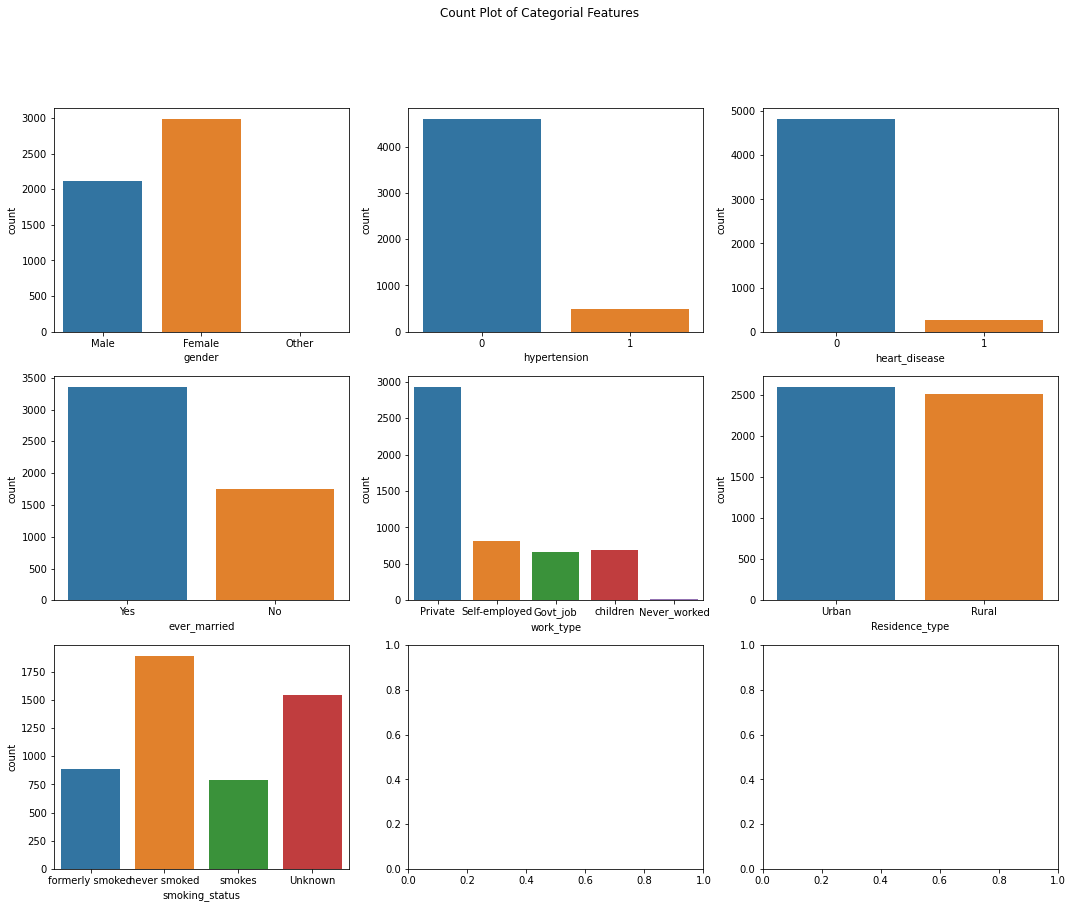

In [13]:
# count plot of all categorial features
myFig,axes = plt.subplots(3,3,figsize = (18,14))
myFig.suptitle("Count Plot of Categorial Features")

sns.countplot(ax=axes[0,0],data=df,x='gender')
sns.countplot(ax=axes[0,1],data=df,x='hypertension')
sns.countplot(ax=axes[0,2],data=df,x='heart_disease')
sns.countplot(ax=axes[1,0],data=df,x='ever_married')
sns.countplot(ax=axes[1,1],data=df,x='work_type')
sns.countplot(ax=axes[1,2],data=df,x='Residence_type')
sns.countplot(ax=axes[2,0],data=df,x='smoking_status')

plt.show()


We can observe that a higher proportion of females are represented and most patients do not have hypertension of heart disease. Most patients are have also been married and work in the private sector.

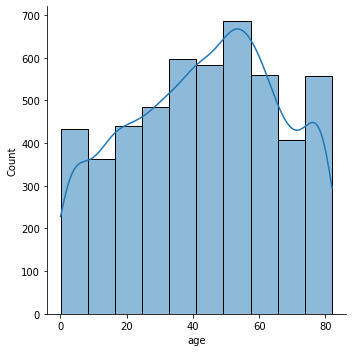

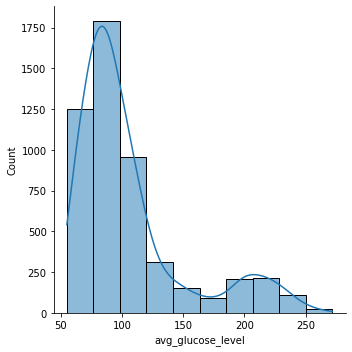

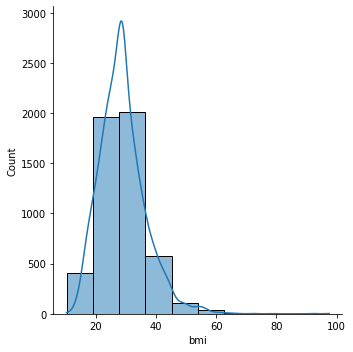

In [12]:
# distribution plots of continuous features

# distribution plot of age
sns.displot(df['age'], bins=10, kde=True)
plt.show()
# distribution plot of average glucose level
sns.displot(df['avg_glucose_level'], bins=10, kde=True)
plt.show()
# distribution plot of bmi
sns.displot(df['bmi'], bins=10, kde=True)
plt.show()

We can observe that the majority of the patients are in the 40–60 age range, have an average glucose level of under 100 and a BMI between 20–40.

In [14]:
# filter out a dataset with stroke patients only
df_stroke = df[df['stroke']>0]
df_stroke.shape
print(df_stroke)

     gender   age  hypertension  ...        bmi   smoking_status stroke
0      Male  67.0             0  ...  36.600000  formerly smoked      1
1    Female  61.0             0  ...  28.893237     never smoked      1
2      Male  80.0             0  ...  32.500000     never smoked      1
3    Female  49.0             0  ...  34.400000           smokes      1
4    Female  79.0             1  ...  24.000000     never smoked      1
..      ...   ...           ...  ...        ...              ...    ...
244    Male  57.0             0  ...  36.700000          Unknown      1
245  Female  14.0             0  ...  30.900000          Unknown      1
246  Female  75.0             0  ...  29.300000  formerly smoked      1
247    Male  71.0             1  ...  28.893237          Unknown      1
248  Female  78.0             0  ...  19.600000          Unknown      1

[249 rows x 11 columns]


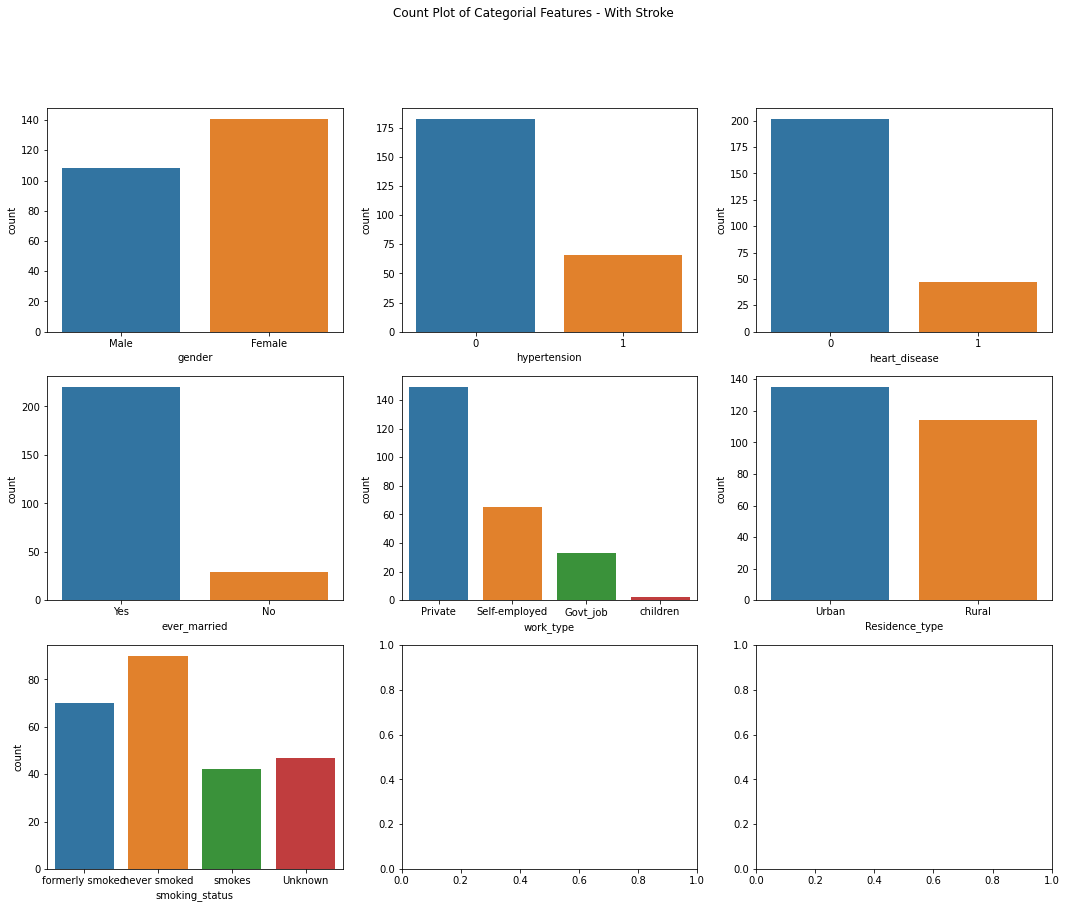

In [15]:
# count plot of all categorial features (those who had a stroke)
myFig1,axes = plt.subplots(3,3,figsize = (18,14))
myFig1.suptitle("Count Plot of Categorial Features - With Stroke")

sns.countplot(ax=axes[0,0],data=df_stroke,x='gender')
sns.countplot(ax=axes[0,1],data=df_stroke,x='hypertension')
sns.countplot(ax=axes[0,2],data=df_stroke,x='heart_disease')
sns.countplot(ax=axes[1,0],data=df_stroke,x='ever_married')
sns.countplot(ax=axes[1,1],data=df_stroke,x='work_type')
sns.countplot(ax=axes[1,2],data=df_stroke,x='Residence_type')
sns.countplot(ax=axes[2,0],data=df_stroke,x='smoking_status')

plt.show()

We can observe that most stroke patients are females with no history of history of hypertension of heart disease. Those who were formerly smokers also have a higher chance of getting a stroke, but those who have never smoked also have a high chance.

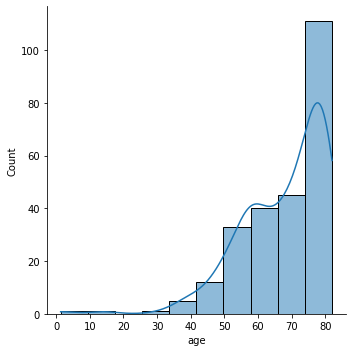

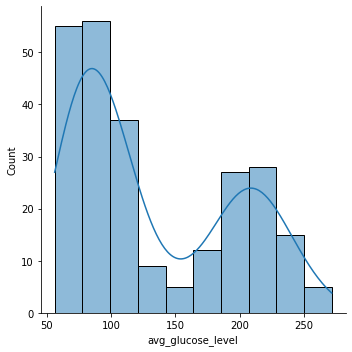

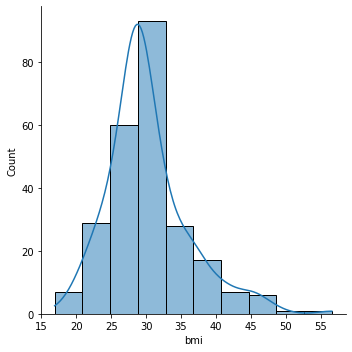

In [16]:
# distribution plots of continuous features (those who had a stroke)

# distribution plot of age
sns.displot(df_stroke['age'], bins=10, kde=True)
plt.show()
# distribution plot of average glucose level
sns.displot(df_stroke['avg_glucose_level'], bins=10, kde=True)
plt.show()
# distribution plot of bmi
sns.displot(df_stroke['bmi'], bins=10, kde=True)
plt.show()

In terms of age, the older you age, the higher chances of getting a stroke. Those with a higher glucose level and a BMI between 30–35 are observed to have a higher chance as well.

In [17]:
# Convert all categorical variables into dummy variables 
df = pd.get_dummies(df, columns=['gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type','smoking_status'])
print(df.head())

    age  avg_glucose_level  ...  smoking_status_never smoked  smoking_status_smokes
0  67.0             228.69  ...                            0                      0
1  61.0             202.21  ...                            1                      0
2  80.0             105.92  ...                            1                      0
3  49.0             171.23  ...                            0                      1
4  79.0             174.12  ...                            1                      0

[5 rows x 24 columns]


In [19]:
# reorder columns with stroke (target) variable in column 0
df = df[['stroke','age', 'avg_glucose_level', 'bmi', 'gender_Female',
       'gender_Male', 'gender_Other', 'hypertension_0', 'hypertension_1',
       'heart_disease_0', 'heart_disease_1', 'ever_married_No',
       'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Rural', 'Residence_type_Urban',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes']]

In [20]:
# identify feature and target variable
# Feature variables
X = df.iloc[:, 1:]
print(X)
# target variables
y = df.iloc[:, 0]
print(y)

       age  ...  smoking_status_smokes
0     67.0  ...                      0
1     61.0  ...                      0
2     80.0  ...                      0
3     49.0  ...                      1
4     79.0  ...                      0
...    ...  ...                    ...
5105  80.0  ...                      0
5106  81.0  ...                      0
5107  35.0  ...                      0
5108  51.0  ...                      0
5109  44.0  ...                      0

[5110 rows x 23 columns]
0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64


In [21]:
# split data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

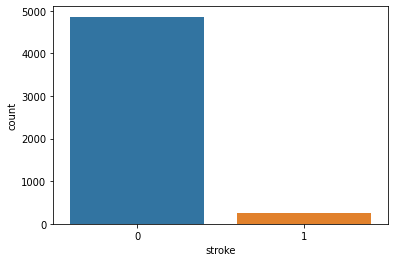

In [22]:
# observe imbalanced target variable data
sns.countplot(data=df,x='stroke')

In [23]:
# Use smote to deal with oversampling
from imblearn.over_sampling import SMOTE

sm_oversample = SMOTE(random_state=42)
X_train,y_train = sm_oversample.fit_resample(X_train, y_train.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


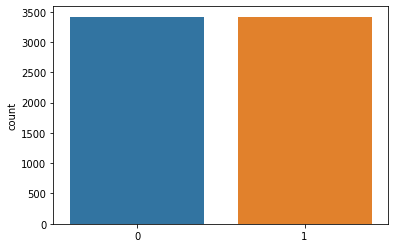

In [24]:
# after balancing the data
sns.countplot(x=y_train);

# Machine Learning Models:

Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("Logistic Regression Accuracy Score:",metrics.accuracy_score(y_test, y_pred_log))

Logisitc Regression Accuracy Score: 0.7566862361382909


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[1096  348]
 [  25   64]]


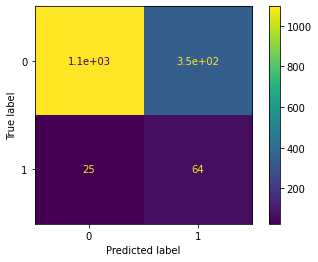

In [35]:
# Plot and print confusion matrix
log_matrix = metrics.confusion_matrix(y_test, y_pred_log)
print(log_matrix)
metrics.plot_confusion_matrix(log_model, X_test, y_test)
plt.show()

Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(criterion='entropy',random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print("Decison Tree Accuracy Score: ", metrics.accuracy_score(y_test, y_pred_dt))

Decison Tree Accuracy Score:  0.903457273320287


[[1375   69]
 [  79   10]]


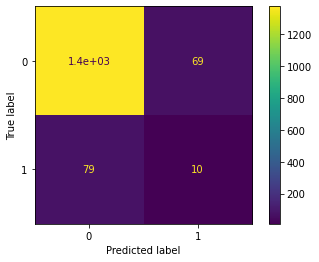

In [44]:
# Plot and print confusion matrix
dt_matrix = metrics.confusion_matrix(y_test, y_pred_dt)
print(dt_matrix)


metrics.plot_confusion_matrix(dt_model, X_test, y_test)
plt.show()

Bagging

In [45]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score


model_bagging = BaggingClassifier(base_estimator = DecisionTreeClassifier(), n_estimators=10, random_state = 42)
model_bagging.fit(X_train, y_train)
y_pred_bagging = model_bagging.predict(X_test)


print("Bagging Accuracy Score: ", metrics.accuracy_score(y_test, y_pred_bagging))

Bagging Accuracy Score:  0.9386823222439661


Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, max_features=7, random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

print("Random Forest Accuracy Score: ", metrics.accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy Score:  0.9412915851272016


Boosting

In [47]:
from sklearn.ensemble import AdaBoostClassifier


base_est = DecisionTreeClassifier (max_depth =4)
ada_boost1 = AdaBoostClassifier(base_est, n_estimators=200, random_state=42, learning_rate=.05)
ada_boost1.fit(X_train, y_train)

y_pred_ada = ada_boost1.predict(X_test)


print("Boosting Accuracy Score: ", metrics.accuracy_score(y_test, y_pred_ada))


Boosting Accuracy Score:  0.9399869536855838


In [48]:
print("Summary of Accuracy Scores")
print("Logistic Regression Accuracy Score:",metrics.accuracy_score(y_test, y_pred_log))
print("Decison Tree Accuracy Score: ", metrics.accuracy_score(y_test, y_pred_dt))
print("Bagging Accuracy Score: ", metrics.accuracy_score(y_test, y_pred_bagging))
print("Random Forest Accuracy Score: ", metrics.accuracy_score(y_test, y_pred_rf))
print("Boosting Accuracy Score: ", metrics.accuracy_score(y_test, y_pred_ada))

Summary of Accuracy Scores
Logisitc Regression Accuracy Score: 0.7566862361382909
Decison Tree Accuracy Score:  0.903457273320287
Bagging Accuracy Score:  0.9386823222439661
Random Forest Accuracy Score:  0.9412915851272016
Boosting Accuracy Score:  0.9399869536855838


Random Forest has highest accuracy: 0.939

Voting Classifier




In [50]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

logClf = LogisticRegression(random_state=42)
dtClf = DecisionTreeClassifier(criterion='entropy',random_state=42)
baggingClf = BaggingClassifier(base_estimator = DecisionTreeClassifier(), n_estimators=10, random_state = 42)
rfClf = RandomForestClassifier(n_estimators=100, max_features=7, random_state=42)
boostClf = AdaBoostClassifier(base_est, n_estimators=200, random_state=42, learning_rate=.05)


clf2 = VotingClassifier(estimators = [('log', logClf), ('dt', dtClf), ('bag',baggingClf), ('rf', rfClf), ('boost', boostClf)], voting='soft') 


clf2.fit(X_train, y_train)

clf2_pred = clf2.predict(X_test)


print('Voting Accuracy score', accuracy_score(y_test, clf2_pred))



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Voting Accuracy score 0.9275929549902152


Voting classifier performs worse than Random Forest itself, hence Random Forest is the optimal model for this dataset. Additionally, Random Forest allows us to idenfity important features (drop any that are irrelevant).

Fine Tune Random Forest


In [51]:
from sklearn.model_selection import RandomizedSearchCV


# fine Tune the model using RandomizedSearchCV

parameters= {'n_estimators':[400,500],
            'max_depth':[7,10],
            'max_features':[4,5],
            'min_samples_split' : [100,150],
            'min_samples_leaf' : [30,40]}


rf = RandomForestClassifier()

rf_model_tune = RandomizedSearchCV(rf, param_distributions = parameters, cv=3,n_iter = 20, verbose=2, random_state=42)

rf_model_tune.fit(X_train,y_train)



Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] n_estimators=500, min_samples_split=100, min_samples_leaf=40, max_features=5, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=500, min_samples_split=100, min_samples_leaf=40, max_features=5, max_depth=10, total=   2.5s
[CV] n_estimators=500, min_samples_split=100, min_samples_leaf=40, max_features=5, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=100, min_samples_leaf=40, max_features=5, max_depth=10, total=   2.5s
[CV] n_estimators=500, min_samples_split=100, min_samples_leaf=40, max_features=5, max_depth=10 
[CV]  n_estimators=500, min_samples_split=100, min_samples_leaf=40, max_features=5, max_depth=10, total=   2.4s
[CV] n_estimators=500, min_samples_split=150, min_samples_leaf=40, max_features=5, max_depth=7 
[CV]  n_estimators=500, min_samples_split=150, min_samples_leaf=40, max_features=5, max_depth=7, total=   2.4s
[CV] n_estimators=500, min_samples_split=150, min_samples_leaf=40, max_features=5, max_depth=7 
[CV]  n_estimators=500, min_samples_split=150, min_samples_leaf=40, max_features=5, max_depth=7, total=   2.4s
[CV] n_estimators=500, min_samples_split=150, min_samples_leaf=40, max_features=5, max_depth=7 
[CV]  n_estimators=500, min_samples_split=150, min_samples_leaf=40, max_features=5, max_depth=7, total=   2.4s
[CV] n_estimators=400, min_samples_split=100, min_samples_

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  2.1min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [52]:
rf_model_tune.best_params_

{'max_depth': 10,
 'max_features': 5,
 'min_samples_leaf': 30,
 'min_samples_split': 100,
 'n_estimators': 400}

In [53]:
# create model with best params
model_rf = RandomForestClassifier(n_estimators= 400,min_samples_split= 100,min_samples_leaf=30,max_features= 5,max_depth=10)

# fit the model
model_rf.fit(X_train,y_train)

# model score
predict_train_RF = model_rf.predict(X_train)
predict_test_RF = model_rf.predict(X_test)

# accuracy score
RF_train_score = model_rf.score(X_train,y_train)
RF_test_score = model_rf.score(X_test,y_test)


print('Accuracy on Train set',RF_train_score)
print('Accuracy on Test set',RF_test_score)



Accuracy on Train set 0.9640035118525022
Accuracy on Test set 0.9354207436399217



Feature Importance

In [54]:
columns_ = df.iloc[:1, 1:].columns
feature_importances = pd.DataFrame(model_rf.feature_importances_,index = columns_,columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances)

                                importance
age                               0.250965
ever_married_No                   0.069915
hypertension_1                    0.069027
ever_married_Yes                  0.067130
hypertension_0                    0.065231
heart_disease_0                   0.054890
heart_disease_1                   0.049672
Residence_type_Urban              0.044059
Residence_type_Rural              0.042906
smoking_status_never smoked       0.040955
smoking_status_formerly smoked    0.038660
smoking_status_Unknown            0.031812
work_type_Private                 0.031284
gender_Female                     0.030033
gender_Male                       0.030025
avg_glucose_level                 0.021714
smoking_status_smokes             0.021220
work_type_Self-employed           0.020768
work_type_Govt_job                0.010567
bmi                               0.008863
work_type_children                0.000304
gender_Other                      0.000000
work_type_N

Classifying a sample patient with the below attributes:

Age: 67

Average glucose level: 240

Bmi: 50

Fender: Male

Hypertension: No

Heart Disease: Yes

Ever Married: Yes

Work Type: Private

Residence Type: Urban

Smoking Status: Formerly Smoked



In [55]:
dfcopy = df.copy()
df2 = {'stroke':0,'age':67, 'avg_glucose_level':240, 'bmi':50, 'gender_Female':0,
       'gender_Male':1, 'gender_Other':0, 'hypertension_0':1, 'hypertension_1':0,
       'heart_disease_0':0, 'heart_disease_1':1, 'ever_married_No':0,
       'ever_married_Yes':1, 'work_type_Govt_job':0, 'work_type_Never_worked':0,
       'work_type_Private':1, 'work_type_Self-employed':0, 'work_type_children':0,
       'Residence_type_Rural':0, 'Residence_type_Urban':1,
       'smoking_status_Unknown':0, 'smoking_status_formerly smoked':1,
       'smoking_status_never smoked':0, 'smoking_status_smokes':0}

dfcopy = dfcopy.append(df2, ignore_index = True)
x2 = dfcopy.iloc[-1:, 1:]
print(x2)
y2 = model_rf.predict(x2)
print(y2)



       age  ...  smoking_status_smokes
5110  67.0  ...                      0

[1 rows x 23 columns]
[1]
